<a href="https://colab.research.google.com/gist/janlukasschroeder/a1979bc74897eb7857780810104b4c82/fama-french-factor-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fama-French Factor Model

In this tutorial, we'll guide you through applying the Fama-French Three-Factor Model to analyze the NASDAQ 100 index, specifically through the QQQ ETF, utilizing various Python's libraries. Our focus will be on QQQ's monthly returns from 2006 to 2023 to understand the influence of the three Fama-French factors on the ETF's performance.

The Fama-French Three-Factor Model is a widely used tool in finance to analyze the performance of stocks and portfolios. It decomposes the returns of a stock or portfolio into three factors: market excess returns, company size, and value. By conducting an Ordinary Least Squares (OLS) regression analysis, we aim to reveal the extent to which these factors can explain the performance of QQQ, and demonstrate how to interpret the results.

## How Fama-French's Factor Model Works

The Fama-French Factor Model is a way to determine what factors influence returns. Returns could be the return of a single stock, a portfolio of multiple stocks or a specific index such as the SP500. It can be applied to individual stocks, portfolios of stocks, mutual funds, or any other type of investment that can be compared to the broader market.

Originally, the model started with three factors, also known as the Fama-French three-factor model. These factors are:

- Market excess returns (Mkt-RF): The return of the SP500 index minus the risk-free rate. This factor captures the overall market movement.
- Size factor (SMB, Small Minus Big): The return of small-cap stocks minus the return of large-cap stocks. This factor captures the outperformance of small-cap stocks over large-cap stocks.
- Value factor (HML, High Minus Low): The return of value stocks minus the return of growth stocks. This factor captures the outperformance of value stocks over growth stocks.

In the later version of the model, the Fama-French five-factor model introduced in 2015, Eugene Fama and Kenneth French added two new factors to the original three-factor model. These additional factors are:

- Profitability factor (RMW, Robust Minus Weak): The excess return of firms with high operating profitability over those with low operating profitability.
- Investment factor (CMA, Conservative Minus Aggressive): The excess return of firms that invest conservatively relative to their assets over those that invest aggressively.

When applying the Fama-French model to a single stock, you're investigating how much of the stock's excess return (over the risk-free rate) can be explained by these three or five factors. You can understand the factors contributing to the stock's performance, which can be especially useful for stock selection and portfolio construction.

Assuming your portfolio made a 15% return last year, the Fama-French model doesn't directly attribute fixed percentages of this return to the factors (e.g., 6% from Mkt-Rf, 8% from SMB, 1% from HML). Instead, it provides a framework to analyze how much of your portfolio's excess return over the risk-free rate can be explained by these factors based on its sensitivity to them.

In order to determine the sentivity and explanatory power of each factor on the portfolio's return, a simple linear regression model is used. The model's output is interpreted as follows:

- Model Coefficients: The regression analysis yields coefficients (betas) for each factor, indicating your portfolio's sensitivity to that factor. For example, if your portfolio is heavily invested in small-cap stocks, your coefficient for SMB would be high, indicating a higher sensitivity to the SMB factor.
- Error Term: The model also includes an error term to account for the portion of the portfolio's return that cannot be explained by the three or five factors. This captures specific risks associated with the portfolio or other unexplained variations.

In essence, the model helps you understand the relationship between your portfolio's excess return and the factors, rather than attributing its return to the factors in a direct, additive way. The actual contribution of each factor to your portfolio's return depends on the portfolio's exposure to those factors, as quantified by the regression coefficients, not just the overall market or average returns of small-cap vs. large-cap or value vs. growth stocks.

The dependent variable (the excess return = outcome of the model) is what you are trying to explain or predict using the model. It is the outcome variable whose variations you aim to understand based on independent variables (factors).


<!-- Fama-French suggested three factors in their first version of the model to explain the variations in stock returns. Those are the risk-adjusted returns of the SP500 (i.e. a stock or portfolio is likely to go up when the broader market is in an uptrend, and down when the market is in a downtrend or bear market), size of firms (small-cap vs large-cap), and book-to-market ratio of firms. -->


### Example

Consider an illustrative scenario where we analyze the annual returns of a certain portfolio using the Fama-French Three-Factor Model. The analysis yields the following coefficients and associated p-values for each factor:

- **Market Excess Return (Mkt-Rf)**: Coefficient = 1.2, p-value = 0.001
- **Size Factor (SMB)**: Coefficient = 0.5, p-value = 0.030
- **Value Factor (HML)**: Coefficient = -0.3, p-value = 0.014

**Interpretation**

- **Market Excess Return (Mkt-Rf)** stands out as the predominant factor influencing the portfolio's returns, evidenced by its substantial coefficient of 1.2. This indicates that for every percentage point increase in the market's excess return, the portfolio's return is expected to increase by 1.2 percentage points, holding other factors constant. The statistical significance of this relationship is underscored by its p-value (0.001), suggesting a highly reliable predictor of the portfolio's performance.
- **Size Factor (SMB)** also plays a notable role, albeit to a lesser extent compared to the market excess return. With a coefficient of 0.5, it implies that the portfolio has a positive but moderate sensitivity to small-cap overperformance relative to large caps. The significance of this factor is confirmed by a p-value of 0.030, indicating a significant but less pronounced impact than the market excess return.
- **Value Factor (HML)**, with a coefficient of -0.3, reveals a negative relationship between the portfolio's returns and the performance of value stocks relative to growth stocks. This suggests that the portfolio may be positioned in such a way that it benefits less from the outperformance of value stocks, or possibly is more aligned with growth stocks. Despite the negative correlation, the factor's influence is statistically significant, as denoted by its p-value of 0.014, albeit it's the least impactful compared to the market excess return and size factor.

This analysis demonstrates that the portfolio's performance is most significantly driven by market movements (Mkt-Rf), with a substantial and statistically significant coefficient. It also exhibits sensitivity to the size of firms (SMB), albeit to a lesser degree, and shows a slight inverse correlation with the value factor (HML). The statistical significance of all factors, as indicated by p-values below the 0.05 threshold, validates their relevance in explaining the portfolio's returns, with the hierarchy of influence clearly starting with the market excess return, followed by the size factor, and finally, the value factor.

## Steps to Replicate Fama-French Three-Factor Model on QQQ in Python

The following example guides you through the steps to apply the Fama-French three-factor model to the monthly returns of the NASDAQ 100 index (ticker: QQQ), and evaluate the impact of the three factors (Mkt-RF, SMB, HML) on QQQ's monthly returns from 2006 to 2023. The steps include:

1. Collect Monthly Returns of QQQ
2. Collect Monthly Returns of Fama-French Factors
3. Merge QQQ Returns and Fama-French Factors
4. Fit the Fama-French Three-Factor Model
5. Interpret the Model Results

### Step 1. Collect Monthly Returns of Portfolio or Asset

We use Yahoo Finance to collect the daily pricing data of QQQ from 2006 to 2023. The `yfinance` library is used to fetch the historical data of QQQ. As we are interested in monthly returns, we resample the daily adjusted closing prices to monthly adjusted closing prices, allowing us to calculate the monthly returns.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

[*********************100%%**********************]  1 of 1 completed


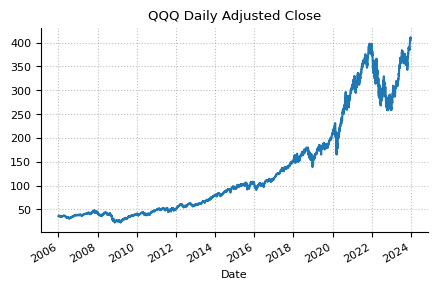

In [ ]:
# use Yahoo Finance to download historical data for QQQ
# over the last 15 years, from 2006-01-01 to 2021-01-01
qqq_daily = yf.download("QQQ", start="2006-01-01", end="2023-12-31")
qqq_daily["Adj Close"].plot(title="QQQ Daily Adjusted Close", figsize=(5, 3))
plt.show()

In [ ]:
# calculate monthly returns of QQQ
qqq_monthly = qqq_daily["Adj Close"].resample("M").ffill().to_frame()
qqq_monthly.index = qqq_monthly.index.to_period("M")
qqq_monthly["Return"] = qqq_monthly["Adj Close"].pct_change() * 100
qqq_monthly.dropna(inplace=True)
qqq_monthly

,Adj Close,Return
Date,,
2006-02,35.565815,-2.142885
2006-03,36.309525,2.091080
2006-04,36.240250,-0.190790
2006-05,33.616402,-7.240149
2006-06,33.595703,-0.061573
...,...,...
2023-08,376.493195,-1.483010
2023-09,357.367859,-5.079862
2023-10,349.986481,-2.065485


### Step 2. Calculate the Fama-French Factors

To simplify our process, we download Fama-French's three factors from Kenneth French's Data Library online. This resource offers updates to the three-factor and five-factor models at least monthly, providing downloadable CSV files for convenience.

Follow the steps below to download the Fama-French three-factor data:

1. Visit the [Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), locate the section titled `Fama/French 3 Factors`, and download the corresponding CSV file. Alternatively, use this [direct link to download the Fama/French 3 Factors CSV file](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip). Upon downloading, you'll receive a ZIP file.
2. Unzip the downloaded file to extract its contents. The unzipped folder contains the CSV file that includes the monthly factors data.
3. The file is split into two sections. The first section contains the monthly factors while the second section represents the annual factors. Copy the first section (monthly factors), and paste it into a new file `F-F_Research_Data_Factors-monthly.csv` in the `./data` directory of your project.

In [ ]:
# Step 2: Load the monthly three factors into a dataframe
# CSV columns: , Mkt-RF, SMB, HML, RF
# The first columns represents the date
# The first row contains the column names
ff_factors_monthly = pd.read_csv(
    "./data/F-F_Research_Data_Factors-monthly.CSV", index_col=0
)
ff_factors_monthly.index.names = ["Date"]
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index, format="%Y%m")
ff_factors_monthly.index = ff_factors_monthly.index.to_period("M")
ff_factors_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-08,-2.39,-3.16,-1.06,0.45
2023-09,-5.24,-2.51,1.52,0.43
2023-10,-3.19,-3.87,0.19,0.47


### Step 3: Calculate Excess Returns of Portfolio or Asset

Next, we calculate the excess returns of QQQ by subtracting the risk-free rate from the monthly returns of QQQ. This gives us the dependent variable (excess returns of QQQ) that we aim to explain using the Fama-French factors. Before that, we filter the Fama-French factors to match the time period of QQQ returns (2006-2023).


In [ ]:
# Filter factor dates to match the asset
ff_factors_subset = ff_factors_monthly[
    ff_factors_monthly.index.isin(qqq_monthly.index)
].copy()

# Step 3: Calculate excess returns for the asset
ff_factors_subset["Excess_Return"] = qqq_monthly["Return"] - ff_factors_subset["RF"]
ff_factors_subset

,Mkt-RF,SMB,HML,RF,Excess_Return
Date,,,,,
2006-02,-0.30,-0.38,-0.34,0.34,-2.482885
2006-03,1.46,3.44,0.60,0.37,1.721080
2006-04,0.73,-1.42,2.34,0.36,-0.550790
2006-05,-3.57,-2.96,2.41,0.43,-7.670149
2006-06,-0.35,-0.39,0.85,0.40,-0.461573
...,...,...,...,...,...
2023-08,-2.39,-3.16,-1.06,0.45,-1.933010
2023-09,-5.24,-2.51,1.52,0.43,-5.509862
2023-10,-3.19,-3.87,0.19,0.47,-2.535485


#### Step 4: Run the Regression Model

We're ready to fit the Fama-French three-factor model using the `statsmodels` library. We use the `ols` function to specify the model formula and fit the model to the data. The model formula is specified as the excess returns of QQQ as the dependent variable and the three Fama-French factors as the independent variables.


In [ ]:
import statsmodels.api as sm

# Prepare the independent variables (add a constant to the model)
X = sm.add_constant(ff_factors_subset[["Mkt-RF", "SMB", "HML"]])
# The dependent variable
y = ff_factors_subset["Excess_Return"]
# Run the regression
model = sm.OLS(y, X).fit()
# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     680.7
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          3.43e-108
Time:                        09:15:36   Log-Likelihood:                -413.33
No. Observations:                 215   AIC:                             834.7
Df Residuals:                     211   BIC:                             848.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2397      0.116      2.067      0.0

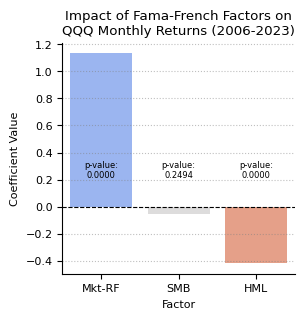

In [ ]:
# Step 5.2: Plot the coefficients and their confidence intervals
factors = model.params.index[1:]  # ['Mkt_Rf', 'SMB', 'HML']
coefficients = model.params.values[1:]
confidence_intervals = model.conf_int().diff(axis=1).iloc[1]

# Create a DataFrame
ols_data = pd.DataFrame(
    {
        "Factor": factors,
        "Coefficient": coefficients,
        "Confidence_Lower": confidence_intervals[0],
        "Confidence_Upper": confidence_intervals[1],
    }
)

# Plotting
plt.figure(figsize=(3, 3))
sns.barplot(x="Factor", y="Coefficient", data=ols_data, capsize=0.2, palette="coolwarm")

# Add the p-value for each factor to the plot
for i, row in ols_data.iterrows():
    plt.text(
        i,
        0.2,
        f"p-value:\n{model.pvalues[row['Factor']]:.4f}",
        ha="center",
        va="bottom",
        fontsize=6,
    )

plt.title("Impact of Fama-French Factors on\nQQQ Monthly Returns (2006-2023)")
plt.xlabel("Factor"); plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.show()

### Step 5: Interpret the Results

The results from the OLS (Ordinary Least Squares) regression fitting the Fama-French three-factor model on the excess monthly returns of QQQ from 2006 to 2023 provide insights into how the returns of QQQ are influenced by market excess returns (Mkt-RF), size factor (SMB), and value factor (HML).

**Tables of coefficients:**

The `coef` values represent the estimated impact of each factor on the excess returns, while the p-values indicate whether these impacts are statistically significant.

- coef: The estimated value of the coefficient. It indicates the change in the dependent variable for a one-unit change in the independent variable, holding other variables constant.
- std err: Standard error of the coefficient estimate. It measures the level of accuracy of the coefficient.
- t: The t-statistic value for the hypothesis test that the coefficient is different from zero. Large absolute values of t indicate that the coefficient is significantly different from zero.
- P > |t|: The p-value associated with the t-statistic. A low p-value (<0.05) suggests that the coefficient is statistically significant, meaning there is evidence that the coefficient is not zero.
- [0.025 0.975]: Confidence intervals provide a range within which the true coefficient value is likely to lie with a certain level of confidence (usually 95%). Narrower intervals around a coefficient indicate more precision in the estimates. The 95% confidence interval for the coefficient. If this interval does not include zero, the coefficient is considered statistically significant at the 5% level.

#### Factor Interpretation

**Constant (const)**

- Coefficient: 0.2397
- This represents the average monthly return of QQQ in excess of the risk-free rate that is not explained by the three Fama-French factors. It's statistically significant (p-value: 0.040), suggesting a positive alpha or performance unrelated to these factors.

**Market Excess Return (Mkt-Rf)**

- Coefficient: 1.1338
- This indicates that QQQ has a strong positive relationship with market excess returns. A 1% increase in market excess returns is associated with a 1.1338% increase in QQQ returns, on average. The coefficient is highly significant (p-value: 0.000), highlighting a strong dependency on market performance.

**Size Factor (SMB)**

- Coefficient: -0.0565
- This suggests a slight negative relationship between QQQ returns and the size premium, but the relationship is not statistically significant (p-value: 0.249). This means that QQQ's monthly returns are not significantly affected by the performance difference between small-cap and large-cap stocks.

**Value Factor (HML)**

- Coefficient: -0.4178
- QQQ shows a significant negative relationship with the value factor. A 1% increase in the value premium (value stocks outperforming growth stocks) is associated with a 0.4178% decrease in QQQ returns, on average. The coefficient is highly significant (p-value: 0.000), indicating that QQQ, which primarily consists of large tech (often considered growth) stocks, tends to perform inversely to the value factor.

**Factors and Their Highest and Lowest Explanatory Power:**

- Highest Explanatory Power: The factor with the highest or lowest coefficient value that is also statistically significant (low p-value) can be considered the most explanatory for the stock's returns. It's the factor to which the stock's returns are most sensitive.

- Lowest Explanatory Power: Conversely, the factor with the smallest absolute coefficient value (close to 0) or a coefficient that is not statistically significant (high p-value) would have the least explanatory power. If a factor's confidence interval includes zero, it also indicates a lack of strong evidence that the factor meaningfully explains the stock's returns.

---

#### Model Diagnostics

- R-squared: Represents the proportion of variance in the dependent variable that can be explained by the independent variables. It's a measure of the model's fit, with values closer to 1 indicating a better fit.
- Adjusted R-squared: Adjusts the R-squared value based on the number of predictors in the model. It's more useful for comparing models with different numbers of independent variables.
- AIC and BIC: Akaike’s Information Criterion (AIC) and Bayesian Information Criterion (BIC) are measures of the model's goodness of fit that also account for the complexity of the model. Lower values generally indicate a better model.

Statistical significance of the model:

- F-statistic: Used to test the overall significance of the model. It checks whether at least one predictor variable has a non-zero coefficient.
- Prob (F-statistic): The p-value associated with the F-statistic. A low value (typically <0.05) indicates that the model is statistically significant.

Other diagnostic tests:

- Omnibus/Prob(Omnibus): Tests the skewness and kurtosis of the residuals to assess the normality. Ideally, you want the Prob(Omnibus) to be close to 1, which would indicate normality.
- Durbin-Watson: Tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation.
- Jarque-Bera (JB)/Prob(JB): Another test for the normality of residuals. Similar to the Omnibus test, a higher Prob(JB) indicates closer adherence to normality.
- Condition Number: Assesses the multicollinearity of the independent variables. Higher values indicate potential multicollinearity problems.

**How to Interpret**

- Good Fit Indicators: High R-squared (adjusted), significant F-statistic, low AIC/BIC, and statistically significant coefficients suggest a good model fit.
- Significance of Variables: Look at the p-values in the coefficients table. Variables with low p-values are considered significant drivers of the dependent variable.
- Model Diagnostics: Check Durbin-Watson for autocorrelation, Jarque-Bera and Omnibus for normality of residuals, and Condition Number for multicollinearity. Deviations in these diagnostics may suggest areas where the model could be improved or caution in interpreting the results.


## Converting Monthly to Quarterly Factors

When dealing with portfolio returns that are not recorded on a monthly or annual basis, but quarterly, it becomes necessary to adjust the Fama-French factors from a monthly to a quarterly format. This adjustment ensures that the factor data aligns with the quarterly returns for accurate analysis. The process involves resampling the monthly data into quarterly intervals, followed by the aggregation of these monthly values to obtain their quarterly equivalents. This method is straightforward for additive data like returns, where the monthly values within each quarter are summed.

However, this approach requires modification when dealing with non-additive data, such as the risk-free rate. For the risk-free rate, the appropriate method is to take the value recorded at the end of each quarter, rather than summing monthly rates. This distinction is crucial for maintaining the accuracy of financial analyses, as it ensures that the risk-free rate reflects the actual market conditions at the end of the quarter.

The following code illustrates how to execute these transformations, showcasing the method for both additive and non-additive data:

In [ ]:
ff_factors_monthly = pd.read_csv(
    "./data/F-F_Research_Data_5_Factors_2x3-monthly.csv", index_col=0
)
ff_factors_monthly.index.names = ["Date"]
ff_factors_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
196308,5.07,-0.80,1.80,0.36,-0.35,0.25
196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
196311,-0.85,-0.88,1.75,-0.51,2.24,0.27
...,...,...,...,...,...,...
202308,-2.39,-3.65,-1.06,3.43,-2.37,0.45
202309,-5.24,-1.80,1.52,1.86,-0.83,0.43
202310,-3.19,-4.04,0.19,2.46,-0.66,0.47


In [ ]:
ff_factors_monthly.index = pd.to_datetime(ff_factors_monthly.index, format="%Y%m")
# Sum up the monthly factors to get quarterly factors
ff_factors_quarterly = ff_factors_monthly.resample("Q").sum()
# For each quarter in ff_factors_quarterly, get the corresponding RF column
# in ff_factors_monthly by looking up the RF value of the last month in the quarter
ff_factors_quarterly["RF"] = ff_factors_monthly["RF"].resample("Q").last()
ff_factors_quarterly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-09-30,3.11,-1.73,0.96,0.33,-1.24,0.27
1963-12-31,3.51,-4.37,1.63,2.32,0.16,0.29
1964-03-31,5.19,1.64,7.69,-2.09,5.60,0.31
1964-06-30,2.79,-1.86,1.81,-1.71,-1.08,0.30
1964-09-30,2.99,0.57,2.53,-0.36,2.88,0.28
...,...,...,...,...,...,...
2022-12-31,6.02,-1.00,10.76,9.97,14.02,0.33
2023-03-31,6.58,-1.87,-13.67,0.81,-8.17,0.36
2023-06-30,7.42,-1.60,-8.02,2.79,-5.98,0.40
